<h3>Bibliotecas</h3>

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import sklearn
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor
import warnings
from sklearn.exceptions import ConvergenceWarning
from sklearn.model_selection import train_test_split, cross_val_score, validation_curve
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import classification_report,confusion_matrix
from math import sqrt

In [2]:
#Lendo os dados, usamos o mesmo dataset fornecido na primeira questão
dados = pd.read_csv('dados-ex5.txt') 
print(dados.shape)
dados.describe().transpose()

(899, 3)


,count,mean,std,min,25%,50%,75%,max
7.717444034211737858e-01,899.0,0.482540,0.872789,-1.361969,-0.098841,0.497590,1.095432,2.474448
-5.480857562296221897e-01,899.0,0.235173,0.532708,-0.956339,-0.228715,0.257811,0.674589,1.405710
1.000000000000000000e+00,899.0,0.499444,0.500278,0.000000,0.000000,0.000000,1.000000,1.000000


In [3]:
#Coluna Alvo
target_column = ['1.000000000000000000e+00'] 
predicao = list(set(list(dados.columns))-set(target_column))
dados[predicao] = dados[predicao]/dados[predicao].max()
dados.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
7.717444034211737858e-01,899.0,0.195009,0.352721,-0.550413,-0.039945,0.201091,0.442698,1.0
-5.480857562296221897e-01,899.0,0.167299,0.378960,-0.680324,-0.162704,0.183402,0.479892,1.0
1.000000000000000000e+00,899.0,0.499444,0.500278,0.000000,0.000000,0.000000,1.000000,1.0


<h3>Treino de 70% e teste de 30%</h3>

In [4]:
X = dados[predicao].values
y = dados[target_column].values

X_treino, X_test, y_treino, y_test = train_test_split(X, y, test_size=0.30, random_state=40)

print(X_treino.shape)
print(X_test.shape)

(629, 2)
(270, 2)


<h3>Modelo MLP</h3>

In [5]:
mlp = MLPClassifier(hidden_layer_sizes=(50,50,50,50,50,50,50), max_iter=100, alpha=1e-4, activation='relu',
                    solver='adam', verbose=10, random_state=1,
                    learning_rate_init=.1)

<h3>Curva de Aprendizado</h3>

/home/danilo/Área de Trabalho/RNA/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Iteration 1, loss = 5.41580803
Iteration 2, loss = 1.21452881
Iteration 3, loss = 0.69226514
Iteration 4, loss = 0.60586809
Iteration 5, loss = 0.46481660
Iteration 6, loss = 0.36960396
Iteration 7, loss = 0.45334188
Iteration 8, loss = 0.36207658
Iteration 9, loss = 0.33064649
Iteration 10, loss = 0.32888142
Iteration 11, loss = 0.33476011
Iteration 12, loss = 0.30221982
Iteration 13, loss = 0.32899515
Iteration 14, loss = 0.30382798
Iteration 15, loss = 0.30693987
Iteration 16, loss = 0.29292096
Iteration 17, loss = 0.28928903
Iteration 18, loss = 0.28506129
Iteration 19, loss = 0.26004321
Iteration 20, loss = 0.25734440
Iteration 21, loss = 0.26844464
Iteration 22, loss = 0.24606822
Iteration 23, loss = 0.24374665
Iteration 24, loss = 0.25108498
Iteration 25, loss = 0.23681544
Iteration 26, loss = 0.23690291
Iteration 27, loss = 0.23061077
Iteration 28, loss = 0.23704583
Iteration 29, loss = 0.24724514
Iteration 30, loss = 0.23235228
Iteration 31, loss = 0.26197510
Iteration 32, los

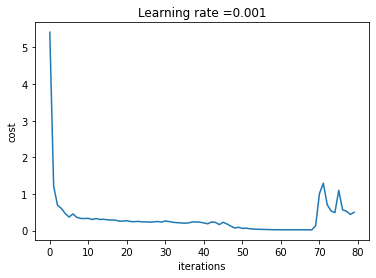

In [6]:
mlp.fit(X_treino,y_treino)
plt.ylabel('cost')
plt.xlabel('iterations')
plt.title("Learning rate =" + str(0.001))
plt.plot(mlp.loss_curve_)
plt.show()

<h3>Acurácia ao longo das épocas</h3>

epoch:  0
Iteration 81, loss = 0.47578531
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 82, loss = 0.69578033
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 83, loss = 0.39737494
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 84, loss = 0.47628220
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 85, loss = 0.51630033
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
epoch:  1
Iteration 86, loss = 0.54749801
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 87, loss = 0.53067958
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 88, loss = 0.53097891
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iter

/home/danilo/Área de Trabalho/RNA/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/danilo/Área de Trabalho/RNA/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/danilo/Área de Trabalho/RNA/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/danilo/Área de Trabalho/RNA/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chan

Iteration 96, loss = 0.47456504
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 97, loss = 0.46833138
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 98, loss = 0.41115430
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 99, loss = 0.48723516
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 100, loss = 0.44719070
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
epoch:  4
Iteration 101, loss = 0.64618636
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 102, loss = 0.42308163
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 103, loss = 0.42594199
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 

/home/danilo/Área de Trabalho/RNA/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/danilo/Área de Trabalho/RNA/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/danilo/Área de Trabalho/RNA/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/danilo/Área de Trabalho/RNA/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chan

Iteration 112, loss = 0.55269523
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 113, loss = 0.57275453
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 114, loss = 0.55986030
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 115, loss = 0.61077849
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
epoch:  7
Iteration 116, loss = 0.60068039
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 117, loss = 0.63693571
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 118, loss = 0.64329591
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 119, loss = 0.63004302
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iterat

/home/danilo/Área de Trabalho/RNA/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/danilo/Área de Trabalho/RNA/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/danilo/Área de Trabalho/RNA/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/danilo/Área de Trabalho/RNA/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chan

Iteration 130, loss = 0.66678933
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
epoch:  10
Iteration 131, loss = 0.66784245
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 132, loss = 0.67913991
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 133, loss = 0.68392016
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 134, loss = 0.66635375
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 135, loss = 0.67483836
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
epoch:  11
Iteration 136, loss = 0.67217842
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 137, loss = 0.66483252
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stop

/home/danilo/Área de Trabalho/RNA/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/danilo/Área de Trabalho/RNA/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/danilo/Área de Trabalho/RNA/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/danilo/Área de Trabalho/RNA/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chan

Iteration 148, loss = 0.68648330
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 149, loss = 0.68154503
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 150, loss = 0.67887266
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
epoch:  14
Iteration 151, loss = 0.68003071
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 152, loss = 0.66697104
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 153, loss = 0.67958345
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 154, loss = 0.65737021
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 155, loss = 0.68936038
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
epoch

/home/danilo/Área de Trabalho/RNA/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/danilo/Área de Trabalho/RNA/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/danilo/Área de Trabalho/RNA/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/danilo/Área de Trabalho/RNA/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chan

Iteration 160, loss = 0.58329813
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
epoch:  16
Iteration 161, loss = 0.59771604
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 162, loss = 0.54919772
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 163, loss = 0.48833361
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 164, loss = 0.47348719
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 165, loss = 0.43003137
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
epoch:  17
Iteration 166, loss = 0.37269437
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


/home/danilo/Área de Trabalho/RNA/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/danilo/Área de Trabalho/RNA/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/danilo/Área de Trabalho/RNA/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/danilo/Área de Trabalho/RNA/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chan

Iteration 167, loss = 0.38488571
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 168, loss = 0.46776475
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 169, loss = 0.39827240
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 170, loss = 0.30070583
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
epoch:  18
Iteration 171, loss = 0.43366854
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 172, loss = 0.42796510
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 173, loss = 0.41390604
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 174, loss = 0.41534262
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Itera

/home/danilo/Área de Trabalho/RNA/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/danilo/Área de Trabalho/RNA/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/danilo/Área de Trabalho/RNA/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/danilo/Área de Trabalho/RNA/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chan

Iteration 183, loss = 0.37463777
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 184, loss = 0.35945125
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 185, loss = 0.33650019
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
epoch:  21
Iteration 186, loss = 0.38233808
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 187, loss = 0.42996970
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 188, loss = 0.34103353
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 189, loss = 0.42627941
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 190, loss = 0.36377598
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
epoch

/home/danilo/Área de Trabalho/RNA/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/danilo/Área de Trabalho/RNA/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/danilo/Área de Trabalho/RNA/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/danilo/Área de Trabalho/RNA/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chan

Iteration 191, loss = 0.39791736
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 192, loss = 0.36298308
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 193, loss = 0.42356314
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 194, loss = 0.40979819
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 195, loss = 0.40788580
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
epoch:  23
Iteration 196, loss = 0.44607397
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 197, loss = 0.34364175
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 198, loss = 0.36203291
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Itera

/home/danilo/Área de Trabalho/RNA/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/danilo/Área de Trabalho/RNA/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/danilo/Área de Trabalho/RNA/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/danilo/Área de Trabalho/RNA/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chan

Iteration 200, loss = 0.47693440
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
epoch:  24
Iteration 201, loss = 0.43421184
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 202, loss = 0.36129914
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 203, loss = 0.36409015
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 204, loss = 0.40359853
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 205, loss = 0.44231308
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


/home/danilo/Área de Trabalho/RNA/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/danilo/Área de Trabalho/RNA/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/danilo/Área de Trabalho/RNA/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/danilo/Área de Trabalho/RNA/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chan

epoch:  25
Iteration 206, loss = 0.37921112
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 207, loss = 0.47258549
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 208, loss = 0.39715465
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 209, loss = 0.37550643
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 210, loss = 0.36897587
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


/home/danilo/Área de Trabalho/RNA/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/danilo/Área de Trabalho/RNA/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/danilo/Área de Trabalho/RNA/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/danilo/Área de Trabalho/RNA/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chan

epoch:  26
Iteration 211, loss = 0.44339960
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 212, loss = 0.40010455
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 213, loss = 0.33937570
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 214, loss = 0.46540430
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


/home/danilo/Área de Trabalho/RNA/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/danilo/Área de Trabalho/RNA/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/danilo/Área de Trabalho/RNA/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/danilo/Área de Trabalho/RNA/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chan

Iteration 215, loss = 0.39803735
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
epoch:  27
Iteration 216, loss = 0.41792637
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 217, loss = 0.41493508
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 218, loss = 0.44385798
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 219, loss = 0.38313079
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 220, loss = 0.39760415
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


/home/danilo/Área de Trabalho/RNA/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/danilo/Área de Trabalho/RNA/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/danilo/Área de Trabalho/RNA/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/danilo/Área de Trabalho/RNA/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chan

epoch:  28
Iteration 221, loss = 0.28975407
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 222, loss = 0.39745071
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 223, loss = 0.48139601
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 224, loss = 0.42674163
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 225, loss = 0.44323858
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
epoch:  29
Iteration 226, loss = 0.30817495
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.

/home/danilo/Área de Trabalho/RNA/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/danilo/Área de Trabalho/RNA/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/danilo/Área de Trabalho/RNA/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/danilo/Área de Trabalho/RNA/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chan


Iteration 227, loss = 0.45934868
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 228, loss = 0.38022658
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 229, loss = 0.53385889
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 230, loss = 0.34663881
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
epoch:  30


/home/danilo/Área de Trabalho/RNA/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/danilo/Área de Trabalho/RNA/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/danilo/Área de Trabalho/RNA/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/danilo/Área de Trabalho/RNA/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chan

Iteration 231, loss = 0.35446730
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 232, loss = 0.42134407
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 233, loss = 0.41622488
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 234, loss = 0.39230769
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 235, loss = 0.43863241
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
epoch:  31
Iteration 236, loss = 0.41511030
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


/home/danilo/Área de Trabalho/RNA/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/danilo/Área de Trabalho/RNA/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/danilo/Área de Trabalho/RNA/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/danilo/Área de Trabalho/RNA/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chan

Iteration 237, loss = 0.42331996
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 238, loss = 0.34206392
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 239, loss = 0.45338476
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 240, loss = 0.38201686
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
epoch:  32
Iteration 241, loss = 0.49098082
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 242, loss = 0.35955243
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


/home/danilo/Área de Trabalho/RNA/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/danilo/Área de Trabalho/RNA/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/danilo/Área de Trabalho/RNA/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/danilo/Área de Trabalho/RNA/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chan

Iteration 243, loss = 0.35593423
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 244, loss = 0.34706406
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 245, loss = 0.46987007
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
epoch:  33
Iteration 246, loss = 0.55179359
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 247, loss = 0.38780538
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 248, loss = 0.42097192
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 249, loss = 0.32699761
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 250, loss = 0.32551846
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
epoch

/home/danilo/Área de Trabalho/RNA/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/danilo/Área de Trabalho/RNA/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/danilo/Área de Trabalho/RNA/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/danilo/Área de Trabalho/RNA/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chan

Iteration 258, loss = 0.34762800
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 259, loss = 0.39826870
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 260, loss = 0.46900380
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
epoch:  36
Iteration 261, loss = 0.45079973
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 262, loss = 0.25317627
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 263, loss = 0.34253909
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 264, loss = 0.52592938
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 265, loss = 0.45085662
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
epoch

/home/danilo/Área de Trabalho/RNA/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/danilo/Área de Trabalho/RNA/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/danilo/Área de Trabalho/RNA/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/danilo/Área de Trabalho/RNA/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chan


Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 278, loss = 0.39983695
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 279, loss = 0.39888258
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 280, loss = 0.37826564
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
epoch:  40
Iteration 281, loss = 0.51766923
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 282, loss = 0.42915953
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 283, loss = 0.32838706
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 284, loss = 0.39301744
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 285, loss = 0.34605912
Trai

/home/danilo/Área de Trabalho/RNA/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/danilo/Área de Trabalho/RNA/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/danilo/Área de Trabalho/RNA/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/danilo/Área de Trabalho/RNA/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chan

epoch:  43
Iteration 296, loss = 0.35234960
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 297, loss = 0.33023479
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 298, loss = 0.43578893
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 299, loss = 0.49559465
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 300, loss = 0.40551236
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
epoch:  44
Iteration 301, loss = 0.33553518
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 302, loss = 0.33765223
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 303, loss = 0.41712742
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stop

/home/danilo/Área de Trabalho/RNA/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/danilo/Área de Trabalho/RNA/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/danilo/Área de Trabalho/RNA/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/danilo/Área de Trabalho/RNA/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chan

Iteration 314, loss = 0.45762691
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 315, loss = 0.45086627
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
epoch:  47
Iteration 316, loss = 0.49516240
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 317, loss = 0.37014246
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 318, loss = 0.45976292
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 319, loss = 0.26855277
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 320, loss = 0.42748869
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
epoch:  48
Iteration 321, loss = 0.37399870
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stop

/home/danilo/Área de Trabalho/RNA/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/danilo/Área de Trabalho/RNA/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/danilo/Área de Trabalho/RNA/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/danilo/Área de Trabalho/RNA/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chan

Iteration 326, loss = 0.43070526
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 327, loss = 0.46256762
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 328, loss = 0.31806905
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 329, loss = 0.43516499
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 330, loss = 0.36843457
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
epoch:  50
Iteration 331, loss = 0.37432817
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 332, loss = 0.45310094
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 333, loss = 0.42802370
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Itera

/home/danilo/Área de Trabalho/RNA/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/danilo/Área de Trabalho/RNA/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/danilo/Área de Trabalho/RNA/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/danilo/Área de Trabalho/RNA/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chan

Iteration 344, loss = 0.40066711
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 345, loss = 0.36349343
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
epoch:  53
Iteration 346, loss = 0.45217223
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 347, loss = 0.49165162
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 348, loss = 0.35998097
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 349, loss = 0.34193794
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 350, loss = 0.37761378
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
epoch:  54
Iteration 351, loss = 0.33803303
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stop

/home/danilo/Área de Trabalho/RNA/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/danilo/Área de Trabalho/RNA/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/danilo/Área de Trabalho/RNA/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/danilo/Área de Trabalho/RNA/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chan


Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
epoch:  56
Iteration 361, loss = 0.32487409
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 362, loss = 0.40904932
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 363, loss = 0.38830882
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 364, loss = 0.44955508
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 365, loss = 0.45084980
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
epoch:  57
Iteration 366, loss = 0.41396886
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 367, loss = 0.45699924
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 368, loss = 0.29

/home/danilo/Área de Trabalho/RNA/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/danilo/Área de Trabalho/RNA/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/danilo/Área de Trabalho/RNA/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/danilo/Área de Trabalho/RNA/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chan

Iteration 376, loss = 0.42500732
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 377, loss = 0.37497661
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 378, loss = 0.33740914
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 379, loss = 0.47780463
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 380, loss = 0.40332919
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


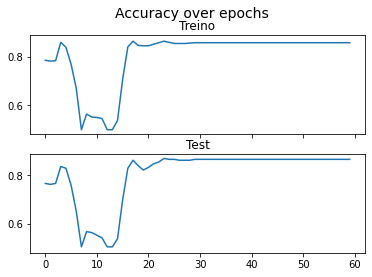

In [7]:
N_TREINO = X_treino.shape[0]
N_EPOCHS = 60
N_BATCH = 128
N_CLASSES = np.unique(y_treino)
scores_treino = []
scores_test = []
epoch = 0

while epoch < N_EPOCHS:
    print('epoch: ', epoch)
    random_perm = np.random.permutation(X_treino.shape[0])
    mini_batch_index = 0
    while True:
        indices = random_perm[mini_batch_index:mini_batch_index + N_BATCH]
        mlp.partial_fit(X_treino[indices], y_treino[indices], classes=N_CLASSES)
        mini_batch_index += N_BATCH

        if mini_batch_index >= N_TREINO:
            break
            
    # SCORE DO TREINO
    scores_treino.append(mlp.score(X_treino, y_treino))

    # SCORE TESTE
    scores_test.append(mlp.score(X_test, y_test))

    epoch += 1

fig, ax = plt.subplots(2, sharex=True, sharey=True)
ax[0].plot(scores_treino)
ax[0].set_title('Treino')
ax[1].plot(scores_test)
ax[1].set_title('Test')
fig.suptitle("Accuracy over epochs", fontsize=14)
plt.show()